#Grupo 25 - Entregable Aprendizaje Supervisado

#Parte 3 de 3

Integrantes:

Rufeil Fiori, Elena

Sosa, Manuel

Taié Mirón, Macarena

Yurovich, Luis Federico

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold

from sklearn.linear_model import LogisticRegression


from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import plot_confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBRegressor, XGBRFRegressor, XGBClassifier, XGBRFClassifier



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
url_test = "/content/drive/MyDrive/DIPLODATOS 2022 grupo 25/Entregables/4 - Aprendizaje Supervisado/df test procesado.csv"
url_train = "/content/drive/MyDrive/DIPLODATOS 2022 grupo 25/Entregables/4 - Aprendizaje Supervisado/df train procesado.csv"
df_train = pd.read_csv(url_train, sep = ',', index_col= 0)
df_test = pd.read_csv(url_test, sep = ',', index_col = 0)

In [ ]:
df = df_train.copy()

In [ ]:
#for df in [df_train, df_test]:
#  %run 'content/drive/MyDrive/DIPLODATOS 2022 grupo 25/Entregables/4 - Aprendizaje Supervisado/3 - AS - Tunning Modelo y Evaluación/2 - AS - Preprocesamiento.ipynb'

In [ ]:
X = df.drop(columns = "Transported")
y = df.Transported

# Reducción del data frame

Tiramos columnas del data frame, que luego de varias pruebas observamos que introducen ruido a los modelos.


In [ ]:
X.columns

Index(['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck', 'Deck', 'Num', 'Side', 'Cabin_qty', 'Total_ammenities',
       'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars',
       'HomePlanet_nan', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e',
       'Destination_nan'],
      dtype='object')

In [ ]:
X = X.drop(columns = ['Total_ammenities', 'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars',
       'HomePlanet_nan', 'Destination_55 Cancri e', 'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e',
       'Destination_nan'])

# División del data frame

Generamos un conjunto de "test" para evaluar los modelos (Train Test Split).

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state = 8)

# Generación de grilla para el ajuste de hiperparámetros (Tunning)

Utilizaremos GridSearch Cross Validation para el modelo de  regresión logística, ya que la velocidad de este método permite recorrer toda la grilla de hiperparámetros. Este no es el caso para los métodos Random Forest y XGBoost, para los cuales utilizaremos RandomizedSearch Cross Validation.

In [ ]:
def tune_model(clf, param_grid, 
               x_train, x_test, 
               y_train, y_test):
  cvc = GridSearchCV(clf, param_grid, cv = 5, scoring = "accuracy", n_jobs = -1)
  cvc.fit(x_train, y_train)

  results = cvc.cv_results_
  df_results = pd.DataFrame(results)

  display(df_results.sort_values('rank_test_score'))


  train_predictions = cvc.predict(x_train)
  accuracy = accuracy_score(y_train, train_predictions)
  print(f"Accuracy train {np.round(accuracy * 100.0,1)}%")

  test_predictions = cvc.predict(x_test)
  accuracy = accuracy_score(y_test, test_predictions)
  print(f"Accuracy test {np.round(accuracy * 100.0,1)}")

  print("\n Train")
  plot_confusion_matrix(cvc,x_train,y_train, normalize = 'true')

  print("\n Test")
  plot_confusion_matrix(cvc,x_test,y_test, normalize = 'true')

  return cvc


In [ ]:
def tune_model_random(clf, param_grid, 
               x_train, x_test, 
               y_train, y_test):
  cvc = RandomizedSearchCV(clf, param_grid, n_iter = 30,cv = 5, scoring = "accuracy", n_jobs = -1)
  cvc.fit(x_train, y_train)

  results = cvc.cv_results_
  df_results = pd.DataFrame(results)

  display(df_results.sort_values('rank_test_score'))


  train_predictions = cvc.predict(x_train)
  accuracy = accuracy_score(y_train, train_predictions)
  print(f"Accuracy train {np.round(accuracy * 100.0,1)}%")

  test_predictions = cvc.predict(x_test)
  accuracy = accuracy_score(y_test, test_predictions)
  print(f"Accuracy test {np.round(accuracy * 100.0,1)}")

  print("\n Train")
  plot_confusion_matrix(cvc,x_train,y_train, normalize = 'true')

  print("\n Test")
  plot_confusion_matrix(cvc,x_test,y_test, normalize = 'true')

  return cvc

# Métodos

Modelos utilizados:

- Regresión Logística
- Random Forest
- XGBoost


## Regresión Logística

La regresión logística requiere dos parámetros: "C" y "penalty", los cuales serán optimizados a través de GridSearchCV.   



In [ ]:
Logist_regr_clf = LogisticRegression(random_state=42)

In [ ]:
C = np.logspace(-4, 4, 10)
penalty = ['l1', 'l2']
max_iter = [100,200]
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

parameters_log_regr = dict(C=C,
                  penalty=penalty,
                  max_iter = max_iter,
                  solver = solver)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
300 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
300 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Sol

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_max_iter,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
115,0.123577,0.009871,0.003163,0.000041,10000.0,100,l2,"{'C': 10000.0, 'max_iter': 100, 'penalty': 'l2'}",0.789894,0.769504,0.787045,0.783496,0.791482,0.784284,0.007874,1
119,0.167771,0.023276,0.002942,0.000515,10000.0,500,l2,"{'C': 10000.0, 'max_iter': 500, 'penalty': 'l2'}",0.789007,0.768617,0.786158,0.783496,0.792369,0.783929,0.008205,2
117,0.179837,0.031603,0.003147,0.000084,10000.0,200,l2,"{'C': 10000.0, 'max_iter': 200, 'penalty': 'l2'}",0.789007,0.768617,0.786158,0.783496,0.792369,0.783929,0.008205,2
113,0.258479,0.045528,0.003692,0.000498,3792.690191,500,l2,"{'C': 3792.690190732246, 'max_iter': 500, 'pen...",0.788121,0.768617,0.787045,0.782609,0.792369,0.783752,0.008180,4
111,0.196237,0.065770,0.004609,0.002995,3792.690191,200,l2,"{'C': 3792.690190732246, 'max_iter': 200, 'pen...",0.788121,0.768617,0.787045,0.782609,0.792369,0.783752,0.008180,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,0.001208,0.000095,0.000000,0.000000,0.004833,200,l1,"{'C': 0.004832930238571752, 'max_iter': 200, '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,116
66,0.002169,0.002152,0.000000,0.000000,4.281332,100,l1,"{'C': 4.281332398719396, 'max_iter': 100, 'pen...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,117
64,0.001218,0.000099,0.000000,0.000000,1.623777,500,l1,"{'C': 1.623776739188721, 'max_iter': 500, 'pen...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,118
72,0.003354,0.004177,0.000000,0.000000,11.288379,100,l1,"{'C': 11.288378916846883, 'max_iter': 100, 'pe...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,119


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Accuracy train 78.6%
Accuracy test 80.1

 Train

 Test


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


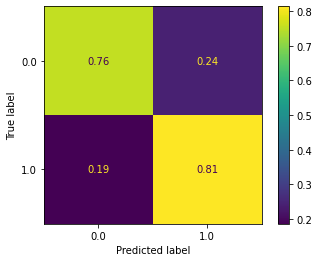

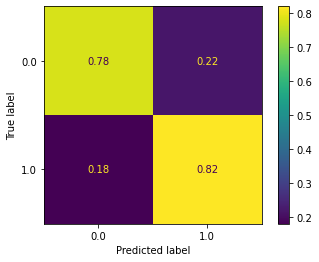

In [ ]:
cvc = tune_model(Logist_regr_clf, parameters_log_regr, 
               x_train, x_test, 
               y_train, y_test)

Observamos que con este método obtenemos:
- Accuracy train 78.6%
- Accuracy test 80.1%

Con estos resultados observamos que este método no presenta sobreajuste. 

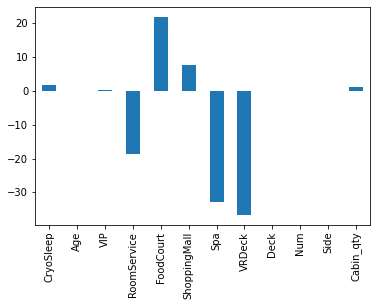

In [ ]:
#cvc.best_estimator_.coef_
bestcoef = pd.Series(cvc.best_estimator_.coef_[0], index = X.columns)
bestcoef.plot(kind="bar")

Aca vemos que las variables más predominantes para la prediccion es: Cryosleep! 

In [ ]:
cvc.best_estimator_.coef_

array([[ 1.68911351e+00,  9.39168157e-02,  1.76672719e-01,
        -1.86265533e+01,  2.18811398e+01,  7.75225835e+00,
        -3.27235186e+01, -3.65978075e+01, -9.64207278e-02,
        -1.14662389e-01, -1.86909446e-03,  1.31090943e+00]])

## Random Forest

Los hiperparámetros optimizados de este modelo son: 'n_estimators', 'max_features', 'max_depth' y 'criterion'.

In [ ]:
clf_rforest = RandomForestClassifier(random_state=42)
rforest_grid = { 
    'n_estimators': [100,200, 350,500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [5,8, 15, 30, None],
    'criterion' :['gini', 'entropy']
}

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.352143,0.027987,0.082917,0.012063,200,log2,8,gini,"{'n_estimators': 200, 'max_features': 'log2', ...",0.796099,0.785461,0.783496,0.797693,0.803904,0.793331,0.007709,1
26,2.515546,0.017313,0.095469,0.002559,200,log2,15,entropy,"{'n_estimators': 200, 'max_features': 'log2', ...",0.798759,0.773936,0.787045,0.805679,0.796806,0.792445,0.011007,2
28,2.508147,0.030532,0.093975,0.001950,200,auto,15,entropy,"{'n_estimators': 200, 'max_features': 'auto', ...",0.798759,0.773936,0.787045,0.805679,0.796806,0.792445,0.011007,2
6,3.120686,0.022269,0.167231,0.004759,350,auto,15,gini,"{'n_estimators': 350, 'max_features': 'auto', ...",0.796099,0.781915,0.780834,0.803904,0.798580,0.792267,0.009250,4
11,1.769997,0.014772,0.074072,0.001358,200,sqrt,8,entropy,"{'n_estimators': 200, 'max_features': 'sqrt', ...",0.796099,0.781915,0.785271,0.799468,0.796806,0.791912,0.006966,5
29,4.369393,0.261309,0.223738,0.025372,500,log2,15,gini,"{'n_estimators': 500, 'max_features': 'log2', ...",0.796099,0.783688,0.779947,0.806566,0.791482,0.791556,0.009409,6
22,4.384504,0.034146,0.181300,0.006954,500,log2,8,entropy,"{'n_estimators': 500, 'max_features': 'log2', ...",0.793440,0.779255,0.779059,0.798580,0.802130,0.790493,0.009659,7
9,1.248741,0.006438,0.050247,0.002314,100,auto,15,entropy,"{'n_estimators': 100, 'max_features': 'auto', ...",0.790780,0.771277,0.787933,0.802130,0.798580,0.790140,0.010734,8
21,1.366794,0.016550,0.050806,0.000553,100,sqrt,None,entropy,"{'n_estimators': 100, 'max_features': 'sqrt', ...",0.789007,0.779255,0.777285,0.790594,0.793256,0.785880,0.006390,9
7,1.370416,0.029743,0.051325,0.000561,100,auto,30,entropy,"{'n_estimators': 100, 'max_features': 'auto', ...",0.786348,0.779255,0.778172,0.794144,0.789707,0.785525,0.006096,10


Accuracy train 83.2%
Accuracy test 79.9

 Train


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)



 Test


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


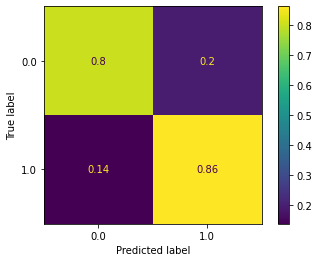

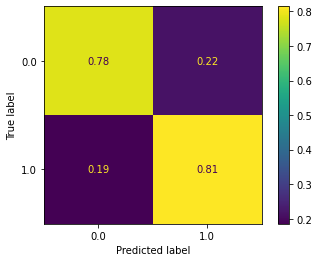

In [ ]:
cvc = tune_model_random(clf_rforest,
           rforest_grid,
            x_train, x_test, 
            y_train, y_test)

Observamos que con este método obtenemos:
- Accuracy train 83.2%
- Accuracy test 79.9%

Con estos resultados observamos que este método presenta un leve sobreajuste, y tiene un accuracy muy similar al del modelo de regresión logística. 

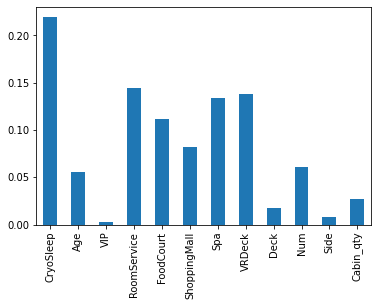

In [ ]:
#cvc.best_estimator_.feature_importance()
bestcoef = pd.Series(cvc.best_estimator_.feature_importances_, index = X.columns)
bestcoef.plot(kind="bar")

## Gradient Boosting

Los hiperparámetros optimizados de este modelo son: colsample_bytree, learning_rate, max_depth, alpha y n_estimators. 

In [ ]:
from xgboost import XGBClassifier, XGBRFClassifier
xgb_clf = XGBClassifier(random_state = 42)

xgboost_grid = dict(objective =['reg:squarederror', 'reg:logistic'],
                         colsample_bytree = [0.1,0.3,0.6],
                         learning_rate = [0.01, 0.1, 0.2, 0.5],
                         max_depth = [2,3,5,7,10], 
                         alpha = [20, 50, 100], 
                         n_estimators = [5,10, 50,100,250])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_objective,param_n_estimators,param_max_depth,param_learning_rate,param_colsample_bytree,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
20,0.280891,0.016225,0.005490,0.000133,reg:logistic,50,5,0.2,0.6,50,"{'objective': 'reg:logistic', 'n_estimators': ...",0.807624,0.786348,0.784383,0.812777,0.796806,0.797588,0.011250,1
12,0.264265,0.006089,0.006351,0.002398,reg:squarederror,100,2,0.5,0.6,50,"{'objective': 'reg:squarederror', 'n_estimator...",0.799645,0.788121,0.787933,0.804791,0.789707,0.794039,0.006901,2
23,0.069021,0.003197,0.003682,0.001278,reg:squarederror,10,5,0.5,0.6,20,"{'objective': 'reg:squarederror', 'n_estimator...",0.787234,0.778369,0.782609,0.793256,0.798580,0.788010,0.007239,3
16,0.571287,0.010807,0.009225,0.000168,reg:squarederror,100,5,0.01,0.6,50,"{'objective': 'reg:squarederror', 'n_estimator...",0.789894,0.770390,0.781721,0.798580,0.796806,0.787478,0.010404,4
24,0.198556,0.005629,0.005513,0.000104,reg:squarederror,50,5,0.1,0.3,50,"{'objective': 'reg:squarederror', 'n_estimator...",0.792553,0.778369,0.774623,0.795031,0.782609,0.784637,0.007930,5
22,1.677647,0.026522,0.022201,0.000345,reg:logistic,250,7,0.2,0.6,100,"{'objective': 'reg:logistic', 'n_estimators': ...",0.786348,0.771277,0.783496,0.789707,0.785271,0.783220,0.006305,6
25,2.413606,0.016898,0.033959,0.005929,reg:logistic,250,10,0.1,0.6,100,"{'objective': 'reg:logistic', 'n_estimators': ...",0.784574,0.778369,0.775510,0.788820,0.781721,0.781799,0.004654,7
15,1.127255,0.016810,0.018434,0.003329,reg:squarederror,100,10,0.1,0.6,100,"{'objective': 'reg:squarederror', 'n_estimator...",0.782801,0.773050,0.775510,0.791482,0.779059,0.780381,0.006455,8
26,0.652874,0.004781,0.013459,0.002387,reg:squarederror,250,3,0.01,0.3,20,"{'objective': 'reg:squarederror', 'n_estimator...",0.790780,0.766844,0.770186,0.792369,0.774623,0.778960,0.010603,9
4,0.042584,0.000701,0.002752,0.000018,reg:squarederror,5,5,0.5,0.6,20,"{'objective': 'reg:squarederror', 'n_estimator...",0.767730,0.768617,0.776398,0.780834,0.779947,0.774705,0.005543,10


Accuracy train 83.6%
Accuracy test 79.7

 Train

 Test


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


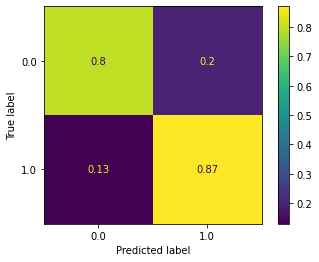

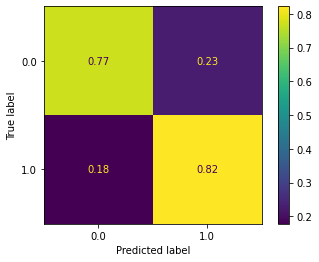

In [ ]:
cvc = tune_model_random(xgb_clf,
           xgboost_grid,
            x_train, x_test, 
            y_train, y_test)

Observamos que con este método obtenemos:
- Accuracy train 83.6%
- Accuracy test 79.7%

Con estos resultados observamos que este método también presenta un leve sobreajuste, y también tiene un accuracy muy similar al del modelo de regresión logística. 


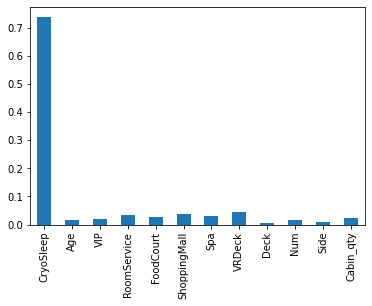

In [ ]:
#cvc.best_estimator_.feature_importance()
bestcoef = pd.Series(cvc.best_estimator_.feature_importances_, index = X.columns)
bestcoef.plot(kind="bar")

# Conclusión 

El máximo accuracy alcanzado fue de 80.1% utilizando el método de regresión logística.